# Classification task - Room occupancy 1

The goal of this taks is to predict a room occupancy based on Temperature, Humidity, Light and CO2 measurements. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

## Data source
[http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

## Feature description
* **Date** - time stamp in the followign format: year-month-day hour:minute:second 
* **Temperature** - temperature in degrees of Celsius 
* **Relative Humidity** - Relative humidity in % 
* **Light** - light intensity in Lux 
* **CO2** - amount of CO2 in the air, measured in ppm 
* **Humidity Ratio** - Humidity ratio derived from temperature and relative humidity, in kgwater-vapor/kg-air 
* **Occupancy** - a target binary value, 0 for not occupied, 1 for occupied status

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mlcollege/introduction-to-ml/master/data/occupancy.csv', sep=',')
data.head()

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Simple classifier
Implement a simple classifier based on all numerical features.

### Data preparation

In [2]:
from sklearn.model_selection import train_test_split

X_all = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_all = data['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(
    X_all, 
    y_all,
    random_state=1,
    test_size=0.1)

print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 18504
Test size: 2056


### Training a classifier

Train a classifier using the following models:
* [Gausssian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [Logistic regression](http://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (experiment with different kernels)
* [Gradient Boosted Trees](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (Experiment with different depths and number of trees)

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

#clf = GaussianNB()
clf = LogisticRegression()
#clf = svm.SVC(kernel='linear')
#clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluate the models

Implement all evaluation methods you have learned in the Scikit-learn tutorial. Decide which model performs best on the given problem.

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print ("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ()
print(metrics.classification_report(y_test, y_pred))

Test accuracy: 0.99

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1570
           1       0.96      0.98      0.97       486

   micro avg       0.99      0.99      0.99      2056
   macro avg       0.98      0.99      0.98      2056
weighted avg       0.99      0.99      0.99      2056



In [5]:
y_pred = clf.predict(X_train)

print ("Train accuracy: {:.2f}".format(accuracy_score(y_train, y_pred)))
print ()
print(metrics.classification_report(y_train, y_pred))

Train accuracy: 0.99

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14240
           1       0.96      1.00      0.98      4264

   micro avg       0.99      0.99      0.99     18504
   macro avg       0.98      0.99      0.99     18504
weighted avg       0.99      0.99      0.99     18504



In [6]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1550   20]
 [   8  478]]


In [7]:
from sklearn.model_selection import cross_val_score

folds = 10
acccuracies = cross_val_score(clf, X_all, y_all, cv=folds, scoring='accuracy')
print('Cross-validated accuracy: {:.2f} with standard deviation {:.2f}'.format(acccuracies.mean(), acccuracies.std()))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross-validated accuracy: 0.99 with standard deviation 0.01


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


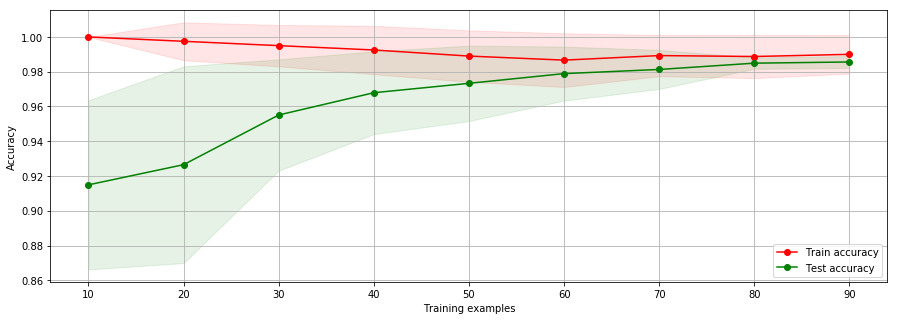

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X_all, y_all,
    train_sizes=range(10,99,10),
    n_jobs=-1,
    cv=cv,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,5))

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test accuracy")

plt.xlabel("Training examples")

plt.ylabel("Accuracy")

plt.grid()

plt.legend(loc="lower right")

plt.show()